In [5]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [6]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [7]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [8]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)<-newnames
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [9]:
airbnb$MetrosCuadrados<-NA
airbnb$MetrosCuadrados<-(airbnb$PiesCuadrados*0.092903)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [10]:
airbnb$CodigoPostal[!grepl("^28", airbnb$CodigoPostal)]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28'] <-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"] <- "28004"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- "28005"
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"] <- "28015"
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- "28013"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- "28002"
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- "28051"
summary(airbnb$CodigoPostal)

-        20013        20126         2015        25008 
           0            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0          231            0          171 
28002\n28002        28003        28004        28005        28006        28007 
           0          185         1795         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1020 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            0           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           17            0            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            0          448

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [11]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045 <NA>  28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:
library(dplyr)
codigos<-airbnb %>%
            count(CodigoPostal, sort = TRUE)
top_n(codigos, 5)
top_n(codigos, -5)

Warning message:
“Factor `CodigoPostal` contains implicit NA, consider using `forcats::fct_explicit_na`”
Selecting by n



CodigoPostal,n
<fct>,<int>
28012,2060
28004,1795
28005,1195
28013,1020
28014,630


Selecting by n



CodigoPostal,n
<fct>,<int>
28048,1
28052,1
28056,1
28058,1
28060,1
28094,1
28105,1
28850,1


¿Cuales son los barrios que hay en el código postal 28012?

In [13]:
barrio<-airbnb[airbnb$CodigoPostal %in% '28012',]
unique(barrio$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [14]:
barrio<-airbnb[airbnb$CodigoPostal %in% '28012',]
barrio$Barrio<-droplevels(barrio$Barrio)
summary(barrio$Barrio)

Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4

In [ ]:
El código postal no es fiable, ya que no debería cubrir tantos barrios.

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [15]:
summary(airbnb$Barrio)

Embajadores                  Universidad 
                        1844                         1358 
                     Palacio                          Sol 
                        1083                          940 
                    Justicia                       Cortes 
                         785                          750 
                   Trafalgar                    Argüelles 
                         315                          264 
             Palos de Moguer                         Goya 
                         262                          229 
            Puerta del Angel                   Guindalera 
                         199                          187 
                    Arapiles                    Recoletos 
                         182                          172 
                     Almagro                      Acacias 
                         155                          145 
                  Gaztambide                     Pacífico 
                         142                          138 
                       Lista                     Delicias 
                         129                          126 
              Cuatro Caminos                      Chopera 
                         120                          112 
                       Ibiza                   Rios Rosas 
                         105                          104 
                 Prosperidad                   Castellana 
                          98                           97 
                   Jerónimos                     Imperial 
                          90                           89 
                  San Isidro                  Castillejos 
                          85                           81 
                   San Diego                Bellas Vistas 
                          80                           79 
                      Ventas                Casa de Campo 
                          78                           75 
                Vista Alegre               Hispanoamérica 
                          74                           72 
            Fuente del Berro                   Berruguete 
                          68                           67 
                    Almenara                       Lucero 
                          62                           62 
                Nueva España                 Vallehermoso 
                          60                           60 
                    Comillas                     Numancia 
                          59                           58 
                      Opañel                Ciudad Jardín 
                          57                           55 
                Valdefuentes                      Adelfas 
                          55                           51 
               Valdeacederas                Pinar del Rey 
                          48                           47 
                  Concepción                  Almendrales 
                          46                           45 
                      Aluche                      El Viso 
                          45                           45 
                    Quintana                     Simancas 
                          45                           45 
                    Valverde                     Canillas 
                          45                           42 
                Pueblo Nuevo  Casco Histórico de Vallecas 
                          41                           40 
                  Peñagrande                Puerta Bonita 
                          39                           38 
                     Legazpi         Ciudad Universitaria 
                          37                           34 
                    Moscardó              Palomeras Bajas 
                          34                           33 
                 Costillares                   San Fermín 
                          32                           32 
     

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [16]:
head(summary(airbnb$Barrio), n = 5)

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [17]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


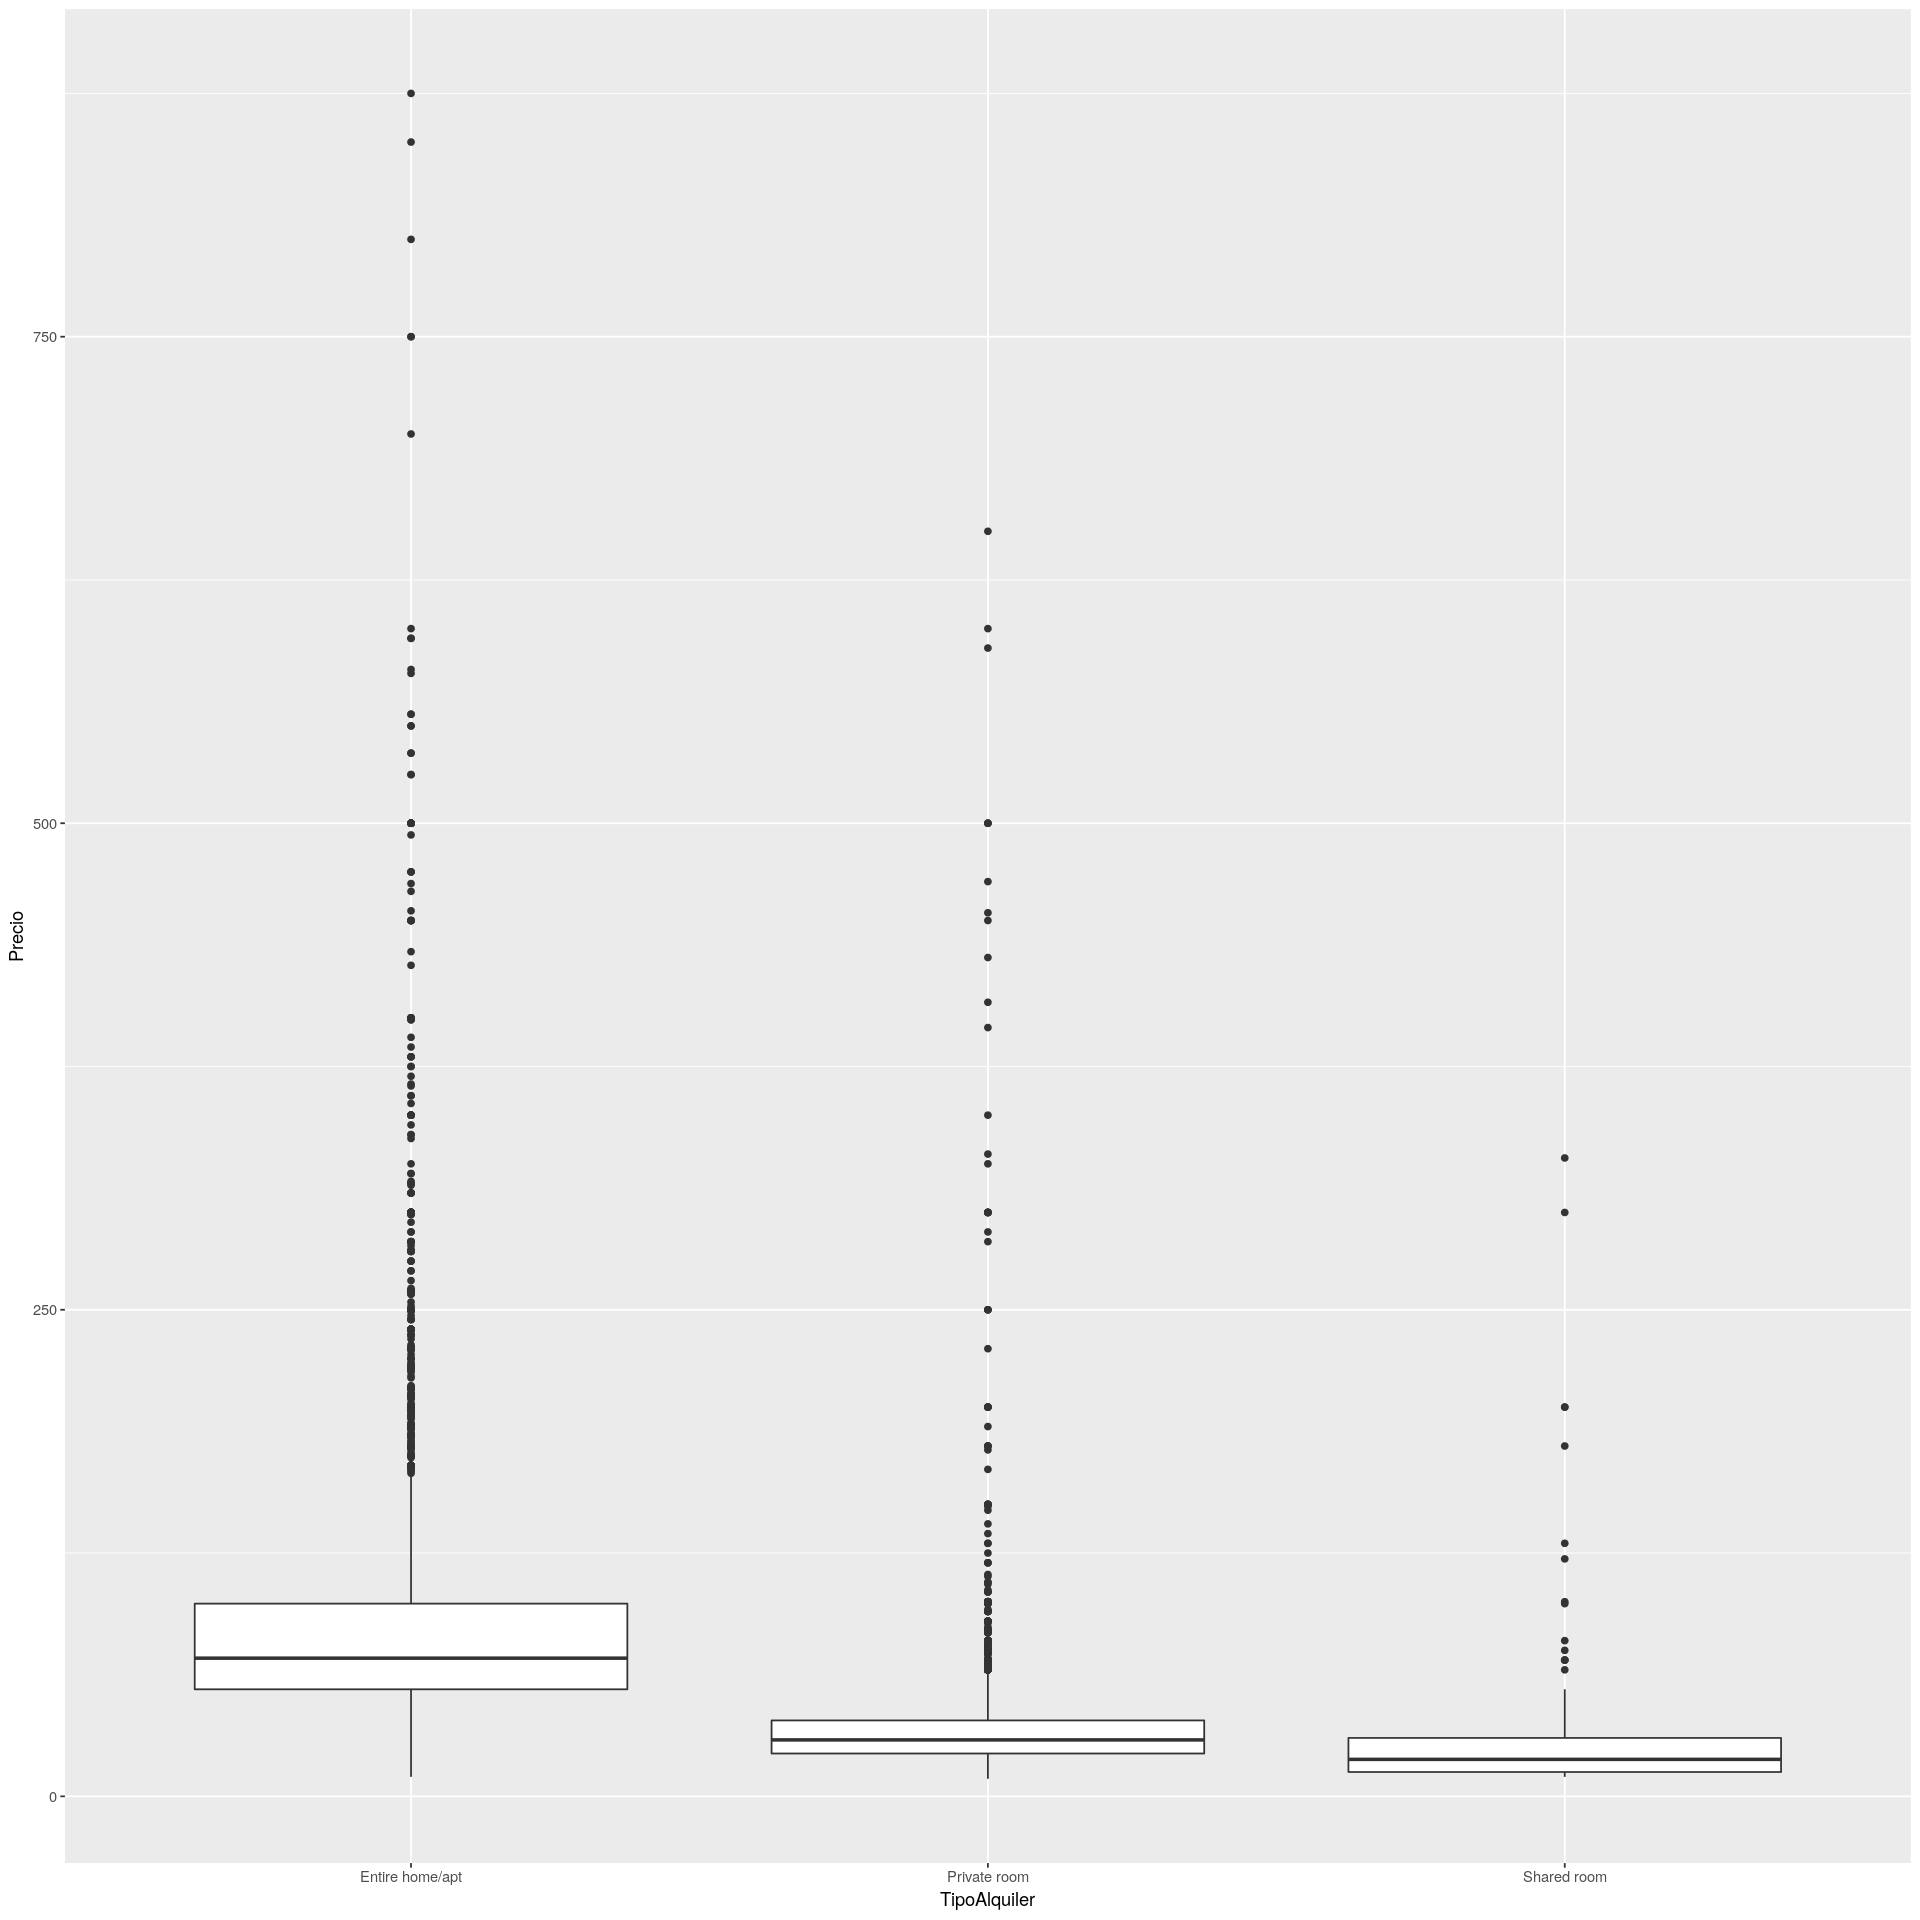

In [18]:
library("ggplot2")
options(repr.plot.height=16,repr.plot.width=16)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio))+geom_boxplot()

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [19]:
Completo<-airbnb[airbnb$TipoAlquiler %in% 'Entire home/apt',]
Privada<-airbnb[airbnb$TipoAlquiler %in% 'Private room',]
Compartida<-airbnb[airbnb$TipoAlquiler %in% 'Shared room',]
paste('El precio medio de un apartamento completo es', mean(Completo$Precio, na.rm=TRUE))
paste('El precio medio de una habitación privada es', mean(Privada$Precio, na.rm=TRUE))
paste('El precio medio de una habitación compartida es', mean(Compartida$Precio))

[1] "El precio medio de un apartamento completo es 87.2966058763931"

[1] "El precio medio de una habitación privada es 34.255135981217"

[1] "El precio medio de una habitación compartida es 29.8534031413613"

In [ ]:
Para comprobar si las medias de varios grupos independientes son iguales, debe emplearse un análisis de varianza o ANOVA:

In [20]:
mediaC<-Completo$Precio
mediaP<-Privada$Precio
mediaS<-Compartida$Precio
df <- rbind(data.frame(value=mediaC,cl="Completo"),data.frame(value=mediaP,cl="Privada"),data.frame(value=mediaS,cl="Compartida"))
summary(aov( value ~ cl, data=df))

               Df   Sum Sq Mean Sq F value Pr(>F)    
cl              2  8981217 4490608    1828 <2e-16 ***
Residuals   13195 32417217    2457                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

In [ ]:
El p valor es menor a 0.05, lo que indica que hay diferencias significativas entre la media de los tres grupos.

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [21]:
airbnb_entire<-rbind(data.frame(airbnb[airbnb$TipoAlquiler %in% 'Entire home/apt',]))
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [22]:
library(dplyr)
top5<-airbnb_entire %>%
            count(Barrio, sort = TRUE)
top_n(top5, 5)

Selecting by n



Barrio,n
<fct>,<int>
Embajadores,1228
Universidad,984
Palacio,769
Sol,701
Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [30]:
tB<-aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
topB<-top_n(tB, 5, Precio)
topBarrios<-data.frame(tB)
top_n(topBarrios, 5, Precio)

Barrio,Precio
<fct>,<dbl>
Castellana,141.3889
El Plantío,150.0000
Fuentelareina,180.0000
Palomas,309.7500
Recoletos,161.9254


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [52]:
library(dplyr)
F<-airbnb_entire %>%
            count(Barrio, sort = TRUE)
Freq<-data.frame(F)
NumeroEntradas<-merge(topBarrios, Freq)
NE<-top_n(NumeroEntradas, 5, Precio)
NE

Barrio,Precio,n
<fct>,<dbl>,<int>
Castellana,141.3889,73
El Plantío,150.0000,1
Fuentelareina,180.0000,2
Palomas,309.7500,4
Recoletos,161.9254,135


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [35]:
CienEntradas<-NumeroEntradas[NumeroEntradas$n > 100,]
top_n(CienEntradas, 5, Precio)

Barrio,Precio,n
<fct>,<dbl>,<int>
Goya,111.33803,142
Justicia,98.25468,534
Recoletos,161.92537,135
Sol,100.75036,701
Trafalgar,98.57848,223


Dibuja el diagrama de densidad de distribución de los diferentes precios

Using Barrio as id variables



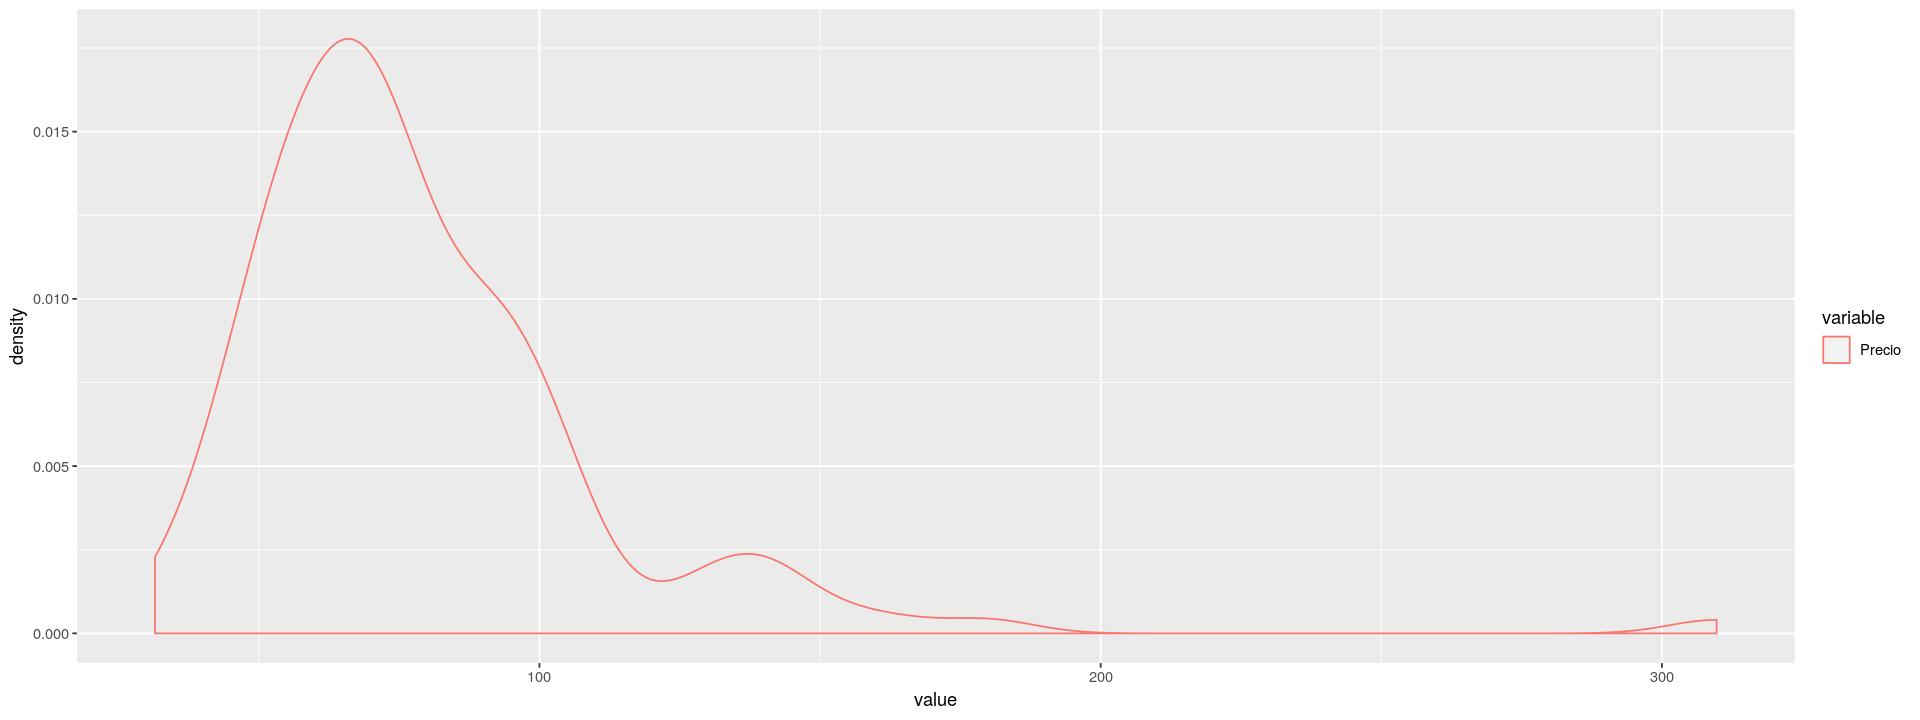

In [60]:
library(ggplot2)
library(reshape2)
options(repr.plot.height=6,repr.plot.width=16)

ggplot(data=melt(topBarrios),aes(x=value,color=variable))+geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [57]:
M<-aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE)
M2<-merge(CienEntradas, M)
AvgM<-top_n(M2, 5, Precio)
AvgM

Barrio,Precio,n,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Using Barrio as id variables



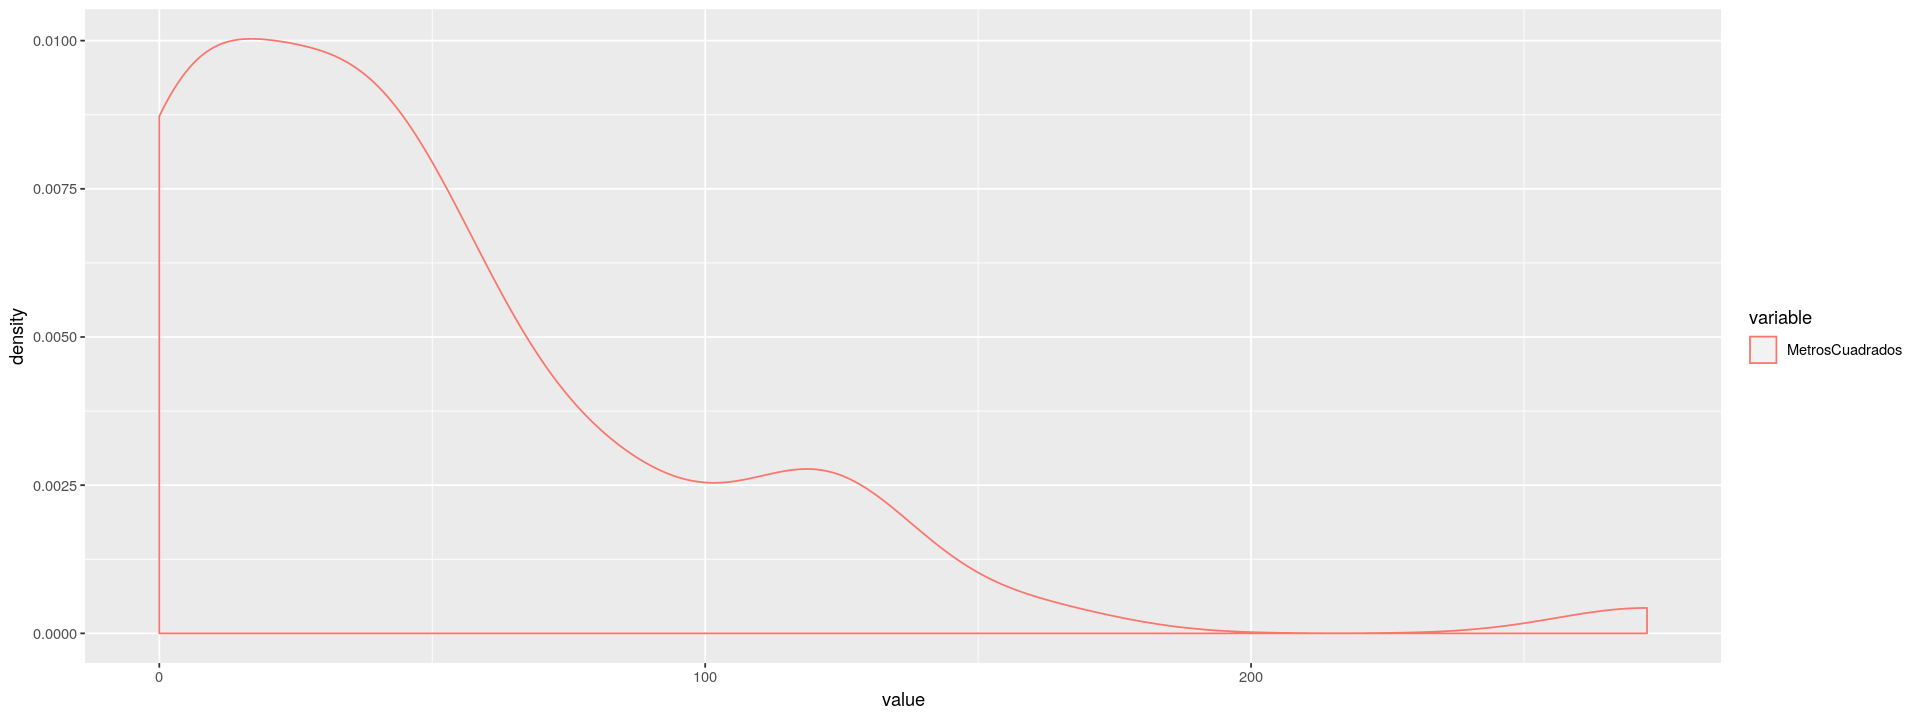

In [64]:
library(ggplot2)
library(reshape2)
options(repr.plot.height=6,repr.plot.width=16)

ggplot(data=melt(M),aes(x=value,color=variable))+geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [ ]:
Para comprobar si las medias de varios grupos significativamente diferentes entre sí, se empleará el análisis de varianza o ANOVA:

In [76]:
G<-"51.68504"
J<-"28.52669"
R<-"26.66316"
S<-"45.61692"
T<-"29.30426"

dataf <- rbind(data.frame(value=G,cl="1"),data.frame(value=J,cl="2"),data.frame(value=R,cl="3"),data.frame(value=S,cl="4"),data.frame(value=T,cl="5"))
summary(aov( value ~ cl, data=df))

               Df   Sum Sq Mean Sq F value Pr(>F)    
cl              2  8981217 4490608    1828 <2e-16 ***
Residuals   13195 32417217    2457                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

In [ ]:
El p valor es menor a 0.05, lo que indica que hay diferencias significativas entre las cinco medias.

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [199]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
Modelo<-lm(MetrosCuadrados~NumBanyos, data=barrio_sol)

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [106]:
summary(Modelo)


Call:
lm(formula = MetrosCuadrados ~ NumBanyos, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.863 -32.498  -4.999  27.517 127.157 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.867     14.084  -0.559    0.579    
NumBanyos     40.365      9.633   4.190 9.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.11 on 58 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.2324,	Adjusted R-squared:  0.2191 
F-statistic: 17.56 on 1 and 58 DF,  p-value: 9.621e-05


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


[1]  60.015338         NA  69.955959  24.990907   0.000000 200.020159
 [7]  49.981814 134.988059  85.006245  40.041193   4.180635  82.033349
[13]  19.045115  65.032100   4.645150  44.965052 120.030676 150.038345
[19]  19.974145  37.997327  36.975394  54.998576 115.013914  30.007669
[25]  57.971472  56.020509 164.995728  74.972721   6.596113  99.963628
[31]  87.979141   9.290300

[1] 1.0 2.0 4.0 2.5 3.0 1.5 6.0

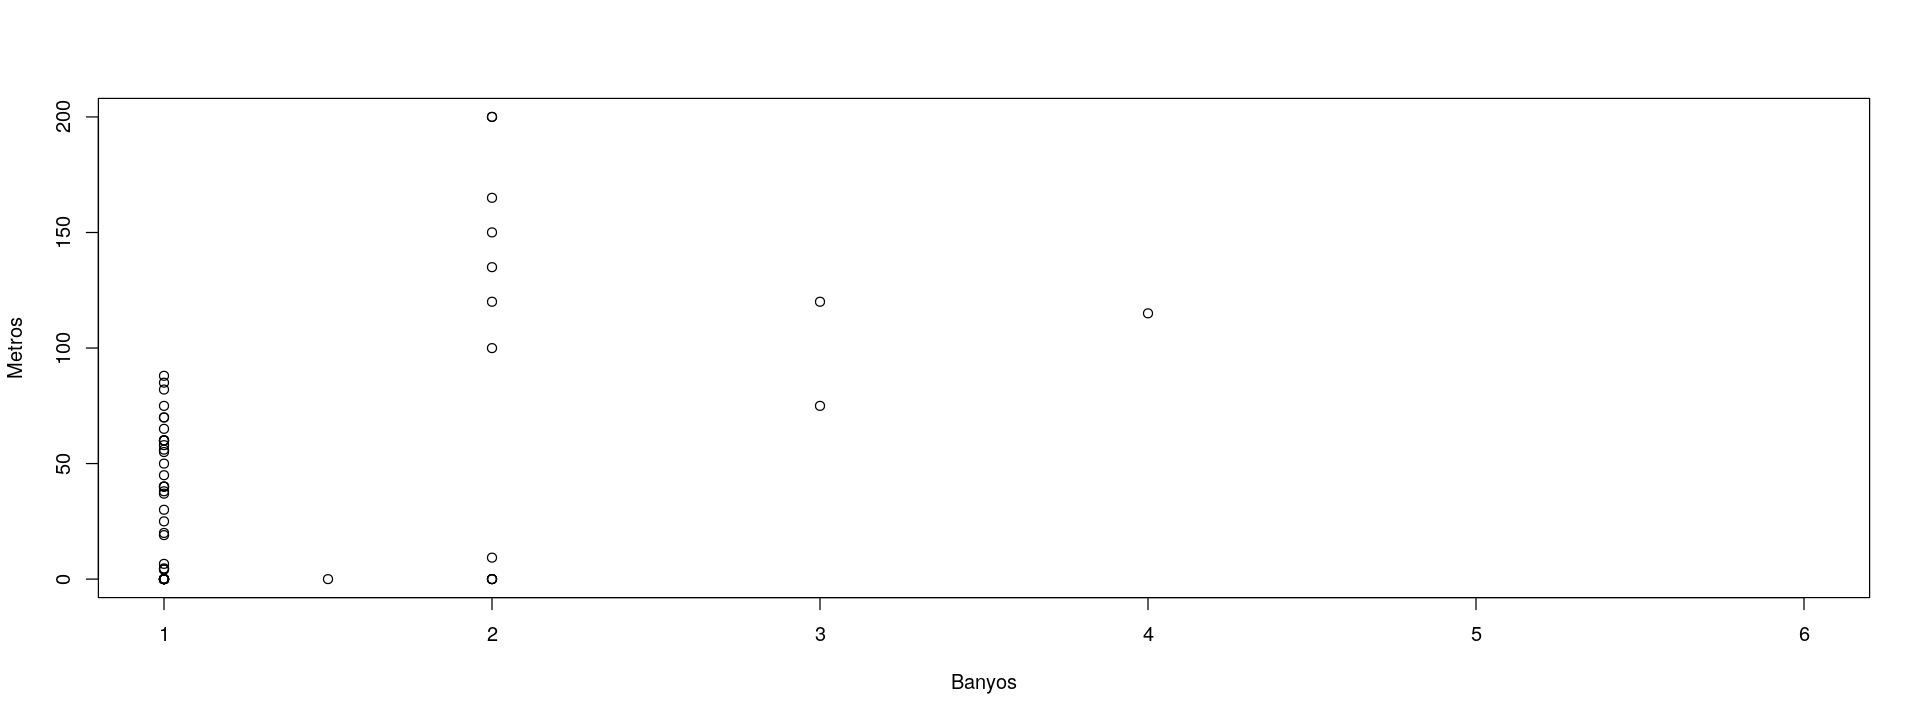

In [207]:
unique(barrio_sol$MetrosCuadrados)
unique(barrio_sol$NumBanyos)

Banyos<-barrio_sol$NumBanyos
Metros<-barrio_sol$MetrosCuadrados
plot(Banyos, Metros)

[1]  60.015338  69.955959  24.990907 200.020159  49.981814 134.988059
 [7]  85.006245  40.041193   4.180635  82.033349  19.045115  65.032100
[13]   4.645150  44.965052 150.038345  19.974145  37.997327  36.975394
[19]  54.998576  30.007669 120.030676  57.971472  56.020509 164.995728
[25]  74.972721   6.596113  99.963628  87.979141

[1] 1 2

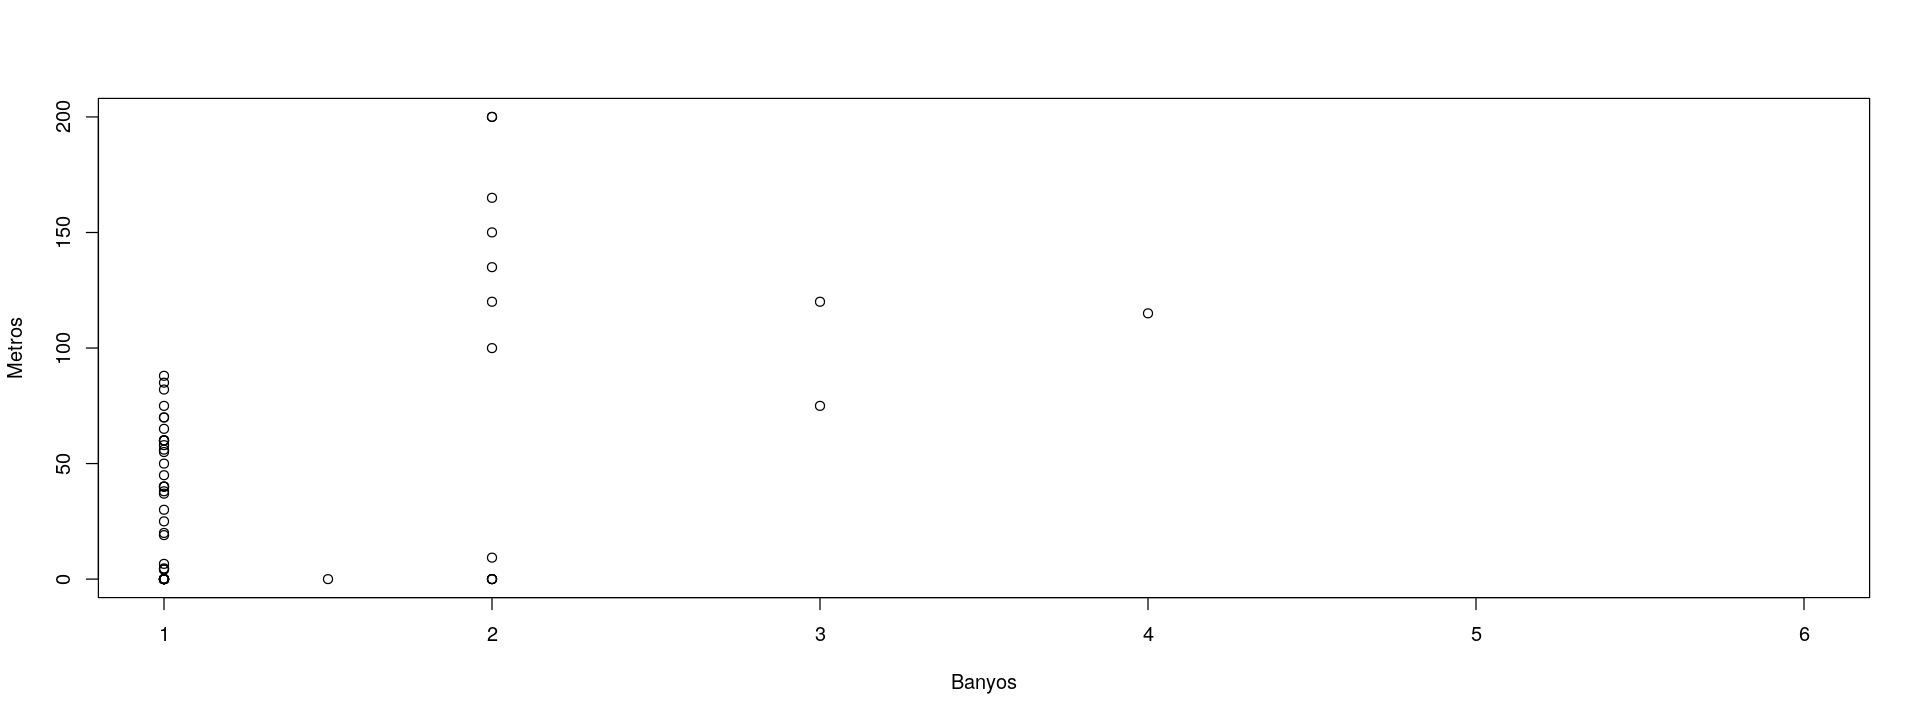

In [198]:
barrio_sol$NumBanyos[barrio_sol$NumBanyos=='1.5'] <-1
barrio_sol$NumBanyos[barrio_sol$NumBanyos=='2.5'] <-2
barrio_sol$NumBanyos[barrio_sol$NumBanyos=='3'] <-NA
barrio_sol$NumBanyos[barrio_sol$NumBanyos=='4'] <-NA
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados=='0'] <-NA
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados=='9.2903'] <-NA
barrio_sol2<-barrio_sol[complete.cases(barrio_sol),]
unique(barrio_sol2$MetrosCuadrados)
unique(barrio_sol2$NumBanyos)
Banyos2<-barrio_sol2$NumBanyos
Metros2<-barrio_sol2$MetrosCuadrados
plot(Banyos, Metros)

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [202]:
MBanyos<-lm(NumBanyos~Precio, data=barrio_sol2)
summary(MBanyos)


Call:
lm(formula = NumBanyos ~ Precio, data = barrio_sol2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45019 -0.13185 -0.06265  0.02454  0.81002 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.6474359  0.0973063   6.654 1.24e-07 ***
Precio      0.0055362  0.0008688   6.372 2.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2749 on 34 degrees of freedom
Multiple R-squared:  0.5443,	Adjusted R-squared:  0.5309 
F-statistic: 40.61 on 1 and 34 DF,  p-value: 2.842e-07


In [204]:
MDormitorios<-lm(NumDormitorios~Precio, data=barrio_sol2)
summary(MDormitorios)


Call:
lm(formula = NumDormitorios ~ Precio, data = barrio_sol2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87559 -0.33674 -0.07599  0.23604  2.59756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.44132    0.21387  -2.064   0.0468 *  
Precio       0.01909    0.00191   9.995 1.18e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6043 on 34 degrees of freedom
Multiple R-squared:  0.7461,	Adjusted R-squared:  0.7386 
F-statistic:  99.9 on 1 and 34 DF,  p-value: 1.182e-11


In [205]:
MOcupantes<-lm(MaxOcupantes~Precio, data=barrio_sol2)
summary(MOcupantes)


Call:
lm(formula = MaxOcupantes ~ Precio, data = barrio_sol2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9115 -1.2202  0.0434  0.4642  5.6075 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.446671   0.543850    2.66   0.0118 *  
Precio      0.030059   0.004856    6.19 4.88e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.537 on 34 degrees of freedom
Multiple R-squared:  0.5299,	Adjusted R-squared:  0.516 
F-statistic: 38.32 on 1 and 34 DF,  p-value: 4.881e-07


In [203]:
MMetros<-lm(MetrosCuadrados~Precio, data=barrio_sol2)
summary(MMetros)


Call:
lm(formula = MetrosCuadrados ~ Precio, data = barrio_sol2)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.864 -17.183  -0.334  13.113  68.425 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.8887    11.3666  -0.518    0.608    
Precio        0.7393     0.1015   7.285 1.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.11 on 34 degrees of freedom
Multiple R-squared:  0.6095,	Adjusted R-squared:  0.598 
F-statistic: 53.07 on 1 and 34 DF,  p-value: 1.953e-08


In [ ]:
De las cuatro variables posibles, la que mejor predice el precio de un inmueble es "NumDormitorios", 
pues su relación lineal con Precio presenta el R2 más alto.

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [ ]:
Por lo expuesto en el apartado anterior, el número de habitaciones es un mejor predictor del precio de un inmueble que
los metros cuadrados.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [210]:
confint(MMetros, level=0.9)

,5 %,95 %
(Intercept),-25.1088062,13.331360
Precio,0.5676956,0.910911


In [ ]:
El coeficiente de la regresión lineal se ha calculado con anterioridad: '0.598'.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [211]:
confint(MDormitorios, level=0.9)

,5 %,95 %
(Intercept),-0.80295581,-0.07968298
Precio,0.01585671,0.02231450


In [ ]:
El coeficiente de la regresión lineal se ha calculado con anterioridad: '0.7386'.

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [ ]:
Para calcular la probabilidad, primero es necesario saber cuántos apartamentos completos hay en alquiler en el barrio de Sol:

In [227]:
barrio_solC<-rbind(data.frame(barrio_sol[barrio_sol$TipoAlquiler %in% 'Entire home/apt',]))
Totales<-count(barrio_solC)
Totales

n
<int>
701


In [ ]:
A continuación, se calcula el número total de apartamentos completos con tres dormitorios:

In [225]:
barrio_solC3<-rbind(data.frame(barrio_solC[barrio_solC$NumDormitorios %in% '3',]))
Favorables<-count(barrio_solC3)
Favorables

n
<int>
55


In [ ]:
La probabilidad se define como el número de casos favorables dividido entre el número de casos posibles. De modo que:

In [228]:
Favorables/Totales

n
<dbl>
0.07845934


In [ ]:
La probabilidad es de 0.0785, o 78,5%.

In [ ]:
El margen de error se obtiene mediante la siguente fórmula:

In [ ]:
E=z* √((ρ (1-ρ))/n)

ρ: probabilidad --> 0.07845934
n: tamaño de la muestra --> 701
z: valor estimado según el intervalo de confianza deseado --> Para 95%: '1.96'

In [233]:
E = 1.96*(sqrt((0.07845934*(1-0.07845934)/701)))
E

[1] 0.01990566

In [ ]:
El error de la probabilidad de encontrar un piso completo con 3 dormitorios en alquiler en el barrio de Sol es de 0.02.